# Modulo 3 Actividad 4

Intención del aprendizaje esperado:

4. Presentar información de un set de datos utilizando librería Seaborn para graficar la información.


**Ejercicios Planteados**

Seaborn es una librería que contiene mucha utilidades. Una de ellas es un conjunto de dataset de ejemplos con los que tendremos datos para analizar y así no necesitaremos cargar archivos externos.


*a) Averiguar cuáles son algunos de los dataset que contiene Seaborn.*

In [1]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

datasets = sns.get_dataset_names()

print('Los datasets  disponibles en Seaborn son:')
print('=' *50)
for i in datasets:
        print(i)


Los datasets  disponibles en Seaborn son:
anagrams
anscombe
attention
brain_networks
car_crashes
diamonds
dots
dowjones
exercise
flights
fmri
geyser
glue
healthexp
iris
mpg
penguins
planets
seaice
taxis
tips
titanic
anagrams
anagrams
anscombe
anscombe
attention
attention
brain_networks
brain_networks
car_crashes
car_crashes
diamonds
diamonds
dots
dots
dowjones
dowjones
exercise
exercise
flights
flights
fmri
fmri
geyser
geyser
glue
glue
healthexp
healthexp
iris
iris
mpg
mpg
penguins
penguins
planets
planets
seaice
seaice
taxis
taxis
tips
tips
titanic
titanic
anagrams
anscombe
attention
brain_networks
car_crashes
diamonds
dots
dowjones
exercise
flights
fmri
geyser
glue
healthexp
iris
mpg
penguins
planets
seaice
taxis
tips
titanic


b) Cargar el dataset de titanic, se utilizará en los siguientes ejercicios.

In [2]:
titanic_dataset = sns.load_dataset('titanic')


c) Confeccione un gráfico de barras para visualizar hombres y mujeres que han sobrevivido.

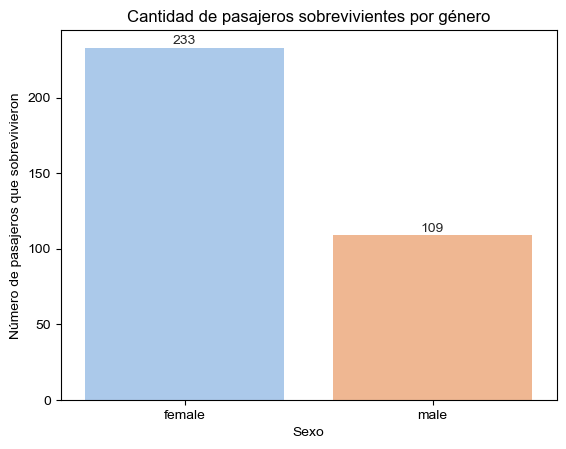

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df_titanic = pd.DataFrame(titanic_dataset)
df_titanic_sobrevivientes = df_titanic[df_titanic['survived'] == 1]

conteo_sobrevivientes = df_titanic_sobrevivientes['sex'].value_counts()
df_conteo_sobrevivientes = pd.DataFrame(conteo_sobrevivientes).reset_index()

sns.barplot(x='sex', y='count', data=df_conteo_sobrevivientes, palette='pastel').set_title('Cantidad de pasajeros sobrevivientes por género')
sns.set_style("whitegrid")


for index, valor in enumerate(df_conteo_sobrevivientes['count']):
    plt.text(index, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10)

plt.xlabel('Sexo')
plt.ylabel('Número de pasajeros que sobrevivieron')

plt.show()



d) Crear un gráfico de distribución de edades por clase de pasajero

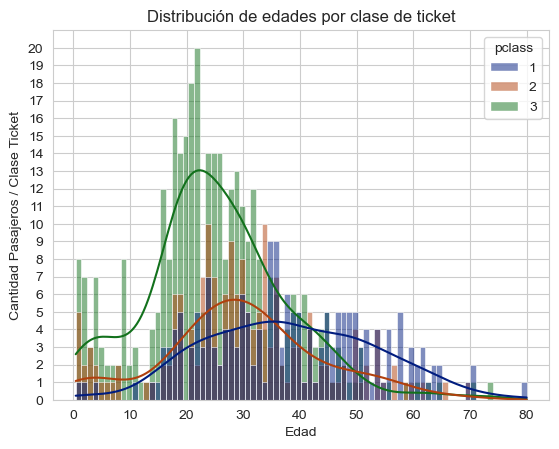

In [4]:
df_titanic

sns.histplot(data=df_titanic, x='age', hue='pclass', bins=80, kde=True, palette='dark')

plt.title('Distribución de edades por clase de ticket')
plt.xlabel('Edad')
plt.ylabel('Cantidad Pasajeros / Clase Ticket')
plt.yticks(range(0, 21, 1))

plt.show()


e) Diagrama de Caja (Boxplot) de Tarifas por Puerto de Embarque.

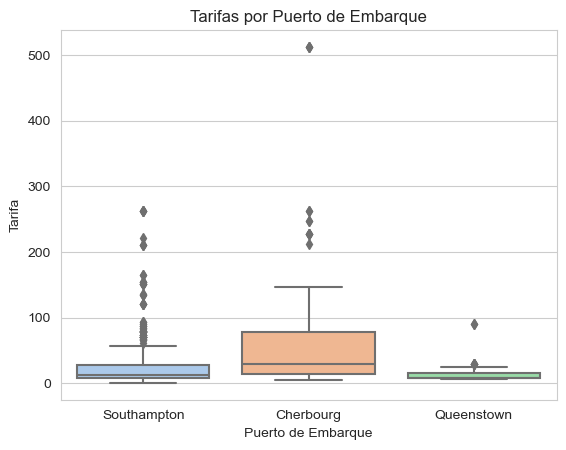

In [5]:
sns.boxplot(data=df_titanic, x='embark_town', y='fare', palette='pastel')

plt.title('Tarifas por Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Tarifa')

plt.show()

f) Gráfico de Violín de Edades por Supervivencia.

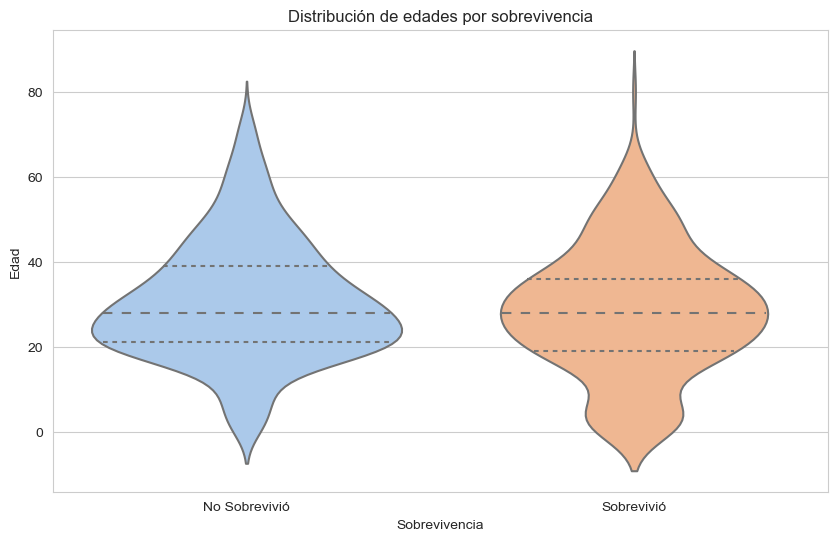

In [6]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='survived', y='age', data=df_titanic, palette='pastel', inner='quartile')

plt.title('Distribución de edades por sobrevivencia')
plt.xlabel('Sobrevivencia')
plt.ylabel('Edad')
plt.xticks(ticks=[0, 1], labels=['No Sobrevivió', 'Sobrevivió'])

plt.show()


g) Diagrama de dispersión de Tarifas vs. Edades por Supervivencia.

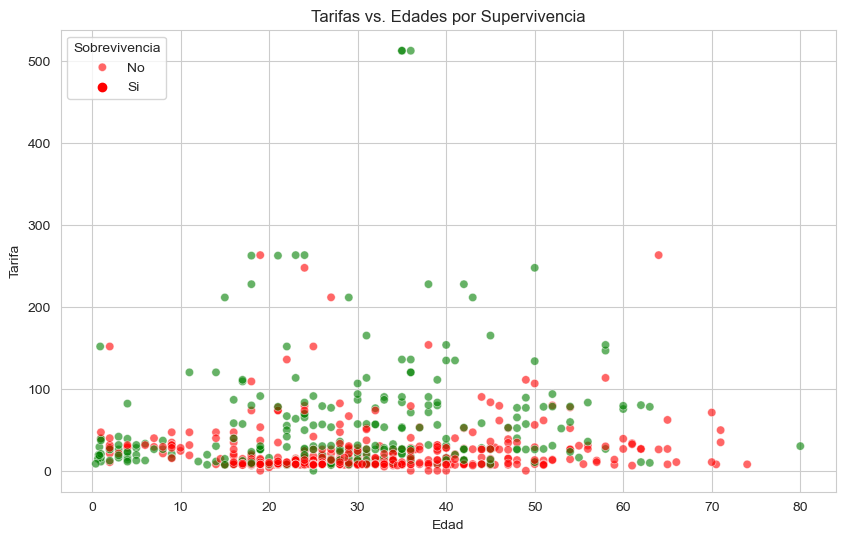

In [7]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='age', y='fare', hue='survived', data=df_titanic, palette=['red', 'green'], alpha=0.6)

plt.title('Tarifas vs. Edades por Supervivencia')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.legend(title='Sobrevivencia', loc='upper left', labels=['No', 'Si'])
plt.show()


h) Crear un agráficos de pilas agrupadas según supervivencia vs clase, agrupadas por puerto de embarque.

In [8]:

df_puertos = pd.DataFrame(titanic_dataset)
df_puertos['embark_town'] =  df_puertos['embark_town'].fillna('Southampton')

df_filtrado_southampton = df_puertos['embark_town'] == 'Southampton'
df_southampton = df_puertos[df_filtrado_southampton]
valores_south = df_southampton['pclass'].value_counts()
df_southampton_doa = df_southampton.groupby(['survived', 'pclass']).size().unstack(fill_value=0)


df_filtrado_cherbourg = df_puertos['embark_town'] == 'Cherbourg'
df_cherbourg = df_puertos[df_filtrado_cherbourg]

df_filtrado_queenstown = df_puertos['embark_town' ]== 'Queenstown'
df_queenstown = df_puertos[df_filtrado_queenstown]






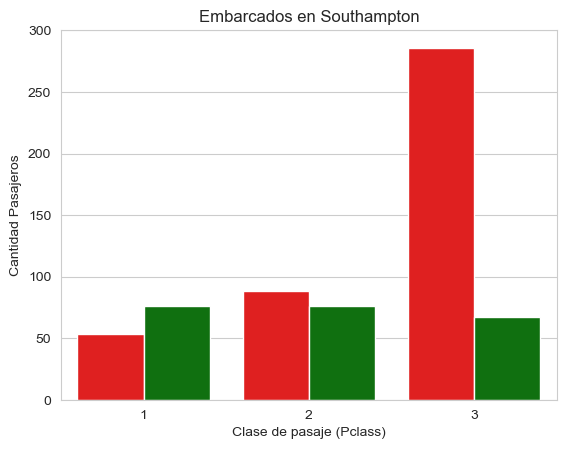

In [9]:
colores = ['red', 'green']

try:
    sns.countplot(data=df_southampton, x='pclass', hue='survived',  palette=colores)
except AttributeError as e:
    print('')

plt.title('Embarcados en Southampton')
plt.xlabel('Clase de pasaje (Pclass)')
plt.ylabel('Cantidad Pasajeros')

plt.show()




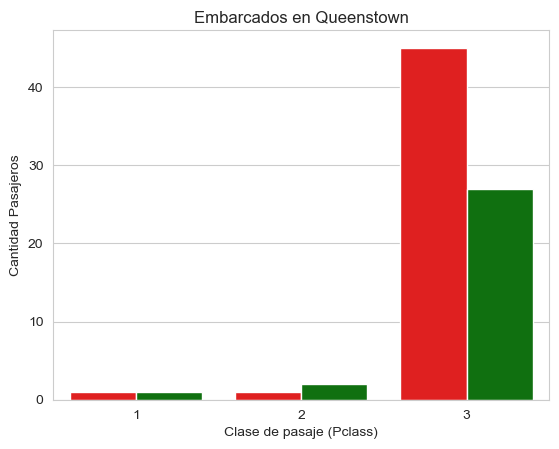

In [10]:
try:
    sns.countplot(data=df_queenstown, x='pclass', hue='survived',  palette=colores)
except AttributeError as e:
    print('')

plt.title('Embarcados en Queenstown')
plt.xlabel('Clase de pasaje (Pclass)')
plt.ylabel('Cantidad Pasajeros')

plt.show()


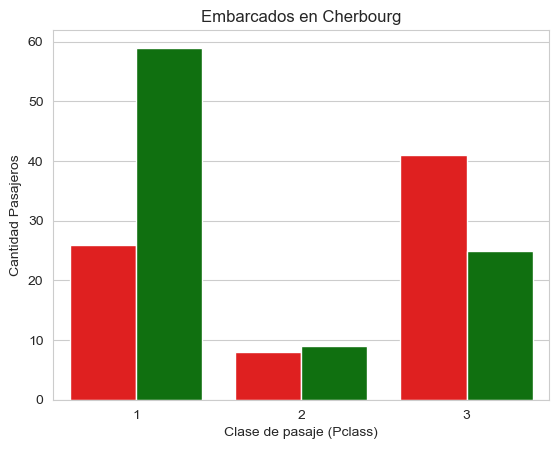

In [11]:
try:
    sns.countplot(data=df_cherbourg, x='pclass', hue='survived',  palette=colores)
except AttributeError as e:
    print('')

plt.title('Embarcados en Cherbourg')
plt.xlabel('Clase de pasaje (Pclass)')
plt.ylabel('Cantidad Pasajeros')

plt.show()

i) pairplot para mostrar gráficos de dispersión y histogramas de las variables 'Age', 'Fare' y 'Pclass' del Titanic, diferenciando entre los pasajeros que sobrevivieron y los que no

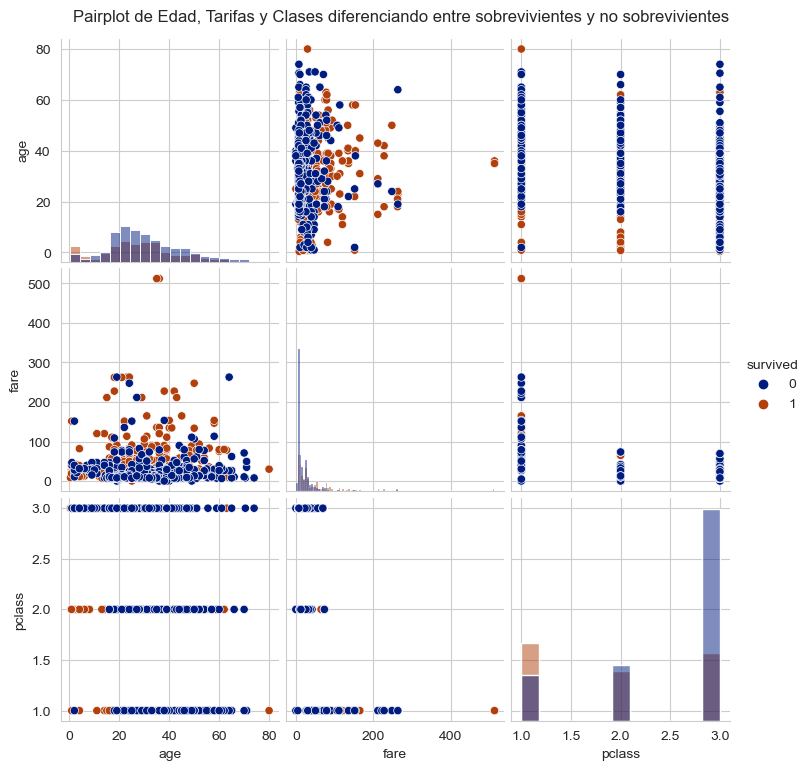

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


df_survived = df_titanic[df_titanic['survived'] == 1]
df_not_survived = df_titanic[df_titanic['survived'] == 0]


variables_de_interes = ['age', 'fare', 'pclass']


df_combined = pd.concat([df_survived, df_not_survived], keys=['Survived', 'Not Survived'])


sns.pairplot(df_combined, vars=variables_de_interes, hue='survived', diag_kind='hist', palette='dark')


plt.suptitle('Pairplot de Edad, Tarifas y Clases diferenciando entre sobrevivientes y no sobrevivientes', y=1.02)

plt.show()
